<a href="https://colab.research.google.com/github/MuHyeonSon/Medical_image_processing/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인공지능을이용한의료영상처리및실습_HW2
#바이오메디컬공학부_손무현

두 번째 과제의 목표는 affine matrix를 정의하여 2D image에 대한 geometric transformation을 수행하는 과정을 이해하는 것입니다. 

rotation, translation, scaling, shearing matrix들의 적절한 정의를 통한 affine transform을 적용하여 두 영상의 엄지 손가락이 최대한 일치하게 만들고, 엄지손가락의 위치와 크기가 비슷해 진 두 영상으로부터 difference image (subtraction image)를 구합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import transform as tf

In [ ]:
path0 = '/content/drive/MyDrive/Digital_image_processing/HW2/'

1. input.jpg와 reference.jpg를 각각 python으로 불러와 image를 display(imshow).

In [ ]:
inp = Image.open(path0+'input.jpg')
ref = Image.open(path0+'reference.jpg')

print(f'inp_format:{inp.format}')
print(f'inp_size:{inp.size}')
print(f'inp_mode:{inp.mode}')

print(f'ref_format:{ref.format}')
print(f'ref_size:{ref.size}')
print(f'ref_mode:{ref.mode}')

inp_format:JPEG
inp_size:(472, 438)
inp_mode:RGB
ref_format:JPEG
ref_size:(349, 349)
ref_mode:RGB


In [ ]:
inp = inp.resize((472,438))
ref = ref.resize((472,438))

Inp = np.array(inp)
Ref =  np.array(ref)

print(f'Inp_shape:{Inp.shape}')
print(f'Ref_shape:{Ref.shape}')

Inp_shape:(438, 472, 3)
Ref_shape:(438, 472, 3)


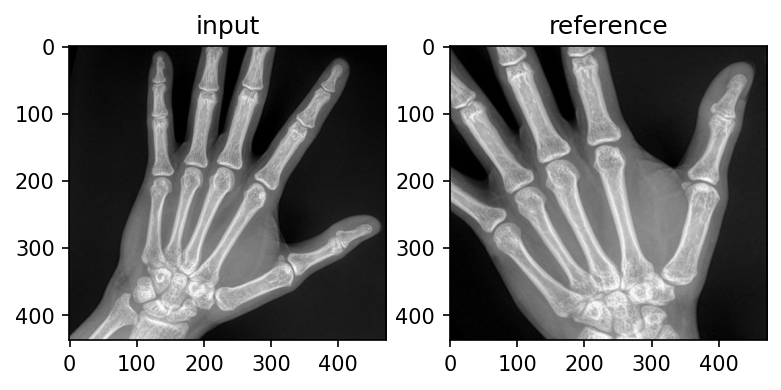

In [ ]:
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(Inp)
plt.title('input')
plt.subplot(1,2,2)
plt.imshow(Ref)
plt.title('reference')
plt.show()

2. 최종변환에 활용한 translation, rotation, scaling, shearing matrix를 모두 출력(print).

In [ ]:
#translation하는 matrix
#t0 = 220
#t1 = -237
t0 = 221
t1 = -236
#t0 = 220
#t1 = -210
T = np.eye(3)
T[0,2]=t0
T[1,2]=t1

print("translation matrix \n")
print(T)
print('\n')
##print(np.dot(T,np.array([4,2,1])))

#rotation (47.5도를 rotating하는 matrix정의)
#theta = 45 * np.pi/180.0
theta = 47.5 * np.pi/180.0
R = np.eye(3)

R[0,0] = np.cos(theta)
R[0,1] = -np.sin(theta)
R[1,0] = np.sin(theta)
R[1,1] = np.cos(theta)

print("rotation matrix (theta = 47.5 degree) \n")
print(R)
print('\n')
##print(np.dot(R,np.array([5,0,1])))

#scailing하는 matrix
s0 = 0.77
s1 = 0.77
#s0 = 0.765
#s1 = 0.765
S = np.eye(3)
S[0,0] = s0
S[1,1] = s1

print("scailing matrix \n")
print(S)
print('\n')
##print(np.dot(S,np.array([4,2,1]))) #4,2라는 좌표넣고 연산해보면 3,2.5로 이동

#shearing matrix(horizontal)
#h0 = 36
#H = np.eye(3)
#H[0,1]=h0
#print(H)

translation matrix 

[[   1.    0.  221.]
 [   0.    1. -236.]
 [   0.    0.    1.]]


rotation matrix (theta = 47.5 degree) 

[[ 0.67559021 -0.73727734  0.        ]
 [ 0.73727734  0.67559021  0.        ]
 [ 0.          0.          1.        ]]


scailing matrix 

[[0.77 0.   0.  ]
 [0.   0.77 0.  ]
 [0.   0.   1.  ]]




3. 위의 과정을 모두 포함할 수 있는 하나의 matrix를 출력(print).

In [ ]:
A = np.dot(np.dot(S,R),T)
print(A)

[[  0.52020446  -0.56770355 248.94322328]
 [  0.56770355   0.52020446   2.69423188]
 [  0.           0.           1.        ]]


4. input image의 엄지손가락이 reference image의 엄지손가락과 위치와 크기가 거의 일치된 결과를 출력

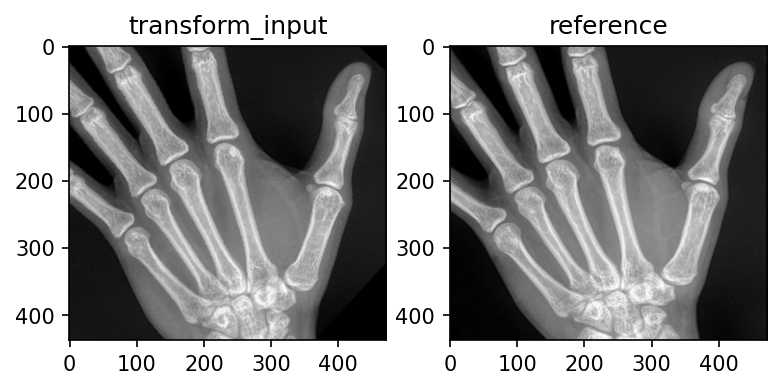

In [ ]:
A = np.dot(np.dot(S,R),T)

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(tf.warp(Inp,A,order=0,mode='constant'),cmap='gray')
plt.title('transform_input')
plt.subplot(1,2,2)
plt.imshow(Ref)
plt.title('reference')
plt.show()

5. 변환된 input과 reference의 subtraction image(difference image)를 출력

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


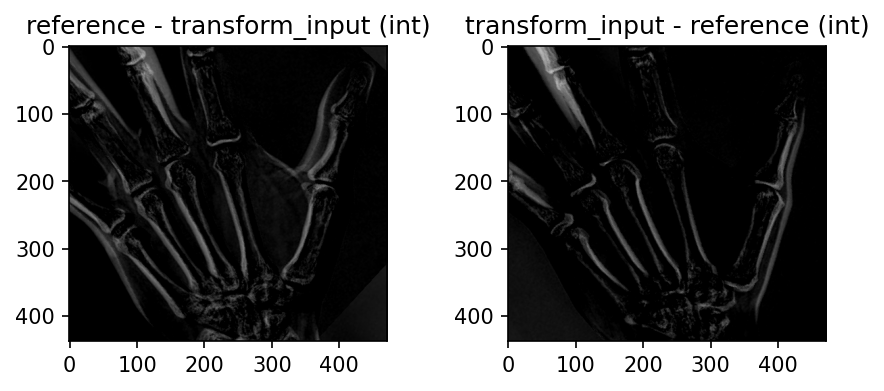

In [ ]:
# subtraction 결과가 잘 안 나온는이유 reference는 각 원소 값이 범위가 0~255이고 정수 형태인데 affine trasform을 적용한 input이미지의 원소값들은 소수점대 숫자들이 나온다.
# 따라서 두 matrix 원소들의 range가 같도록 만들어줘야한다.(0~255)

#Affine transform을 적용한 matrix의 원소값들은 range가 0~1이므로 subtract 연산을 하려면 
#reference와 range를 맞추줘야 하기 때문에 Min-max normalization을 진행하여 tra의 range를 (0~255)로 변경.

tra = tf.warp(Inp,A,order=0,mode='constant')
tra = (255*(tra - np.min(tra))/(np.max(tra)-np.min(tra)))

# transform된 input - reference 과 reference input (data type : int)

sub1 = (Ref.astype(int)) - (tra.astype(int))
sub2 = (tra.astype(int)) - (Ref.astype(int))

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(sub1)
plt.title('reference - transform_input (int)')
plt.subplot(1,2,2)
plt.imshow(sub2)
plt.title('transform_input - reference (int)')
plt.tight_layout()
plt.show()

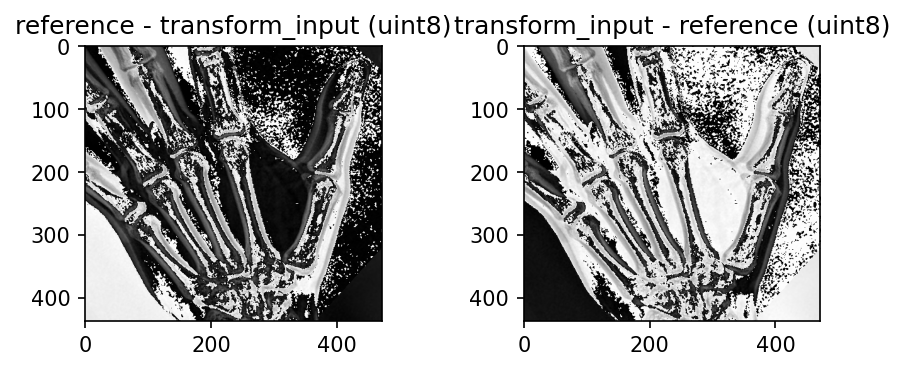

In [ ]:
# transform된 input - reference 과 reference input (data type : uint8)

sub3 = (Ref) - (tra.astype(np.uint8))
sub4 = (tra.astype(np.uint8) - (Ref))

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(sub3)
plt.title('reference - transform_input (uint8)')
plt.subplot(1,2,2)
plt.imshow(sub4)
plt.title('transform_input - reference (uint8)')
plt.tight_layout()
plt.show()

In [ ]:
print(type((tra.astype(np.uint8)[1][1][1])))

<class 'numpy.uint8'>


In [ ]:
print(len(tra))

tra = (255*(tra - np.min(tra))/(np.max(tra)-np.min(tra))).astype(int)
Ref

print(Ref)
print(np.min(tra))
print(np.max(tra))

#plt.figure(dpi=100)
#plt.imshow(tra)
#plt.imshow

438
[[[ 6  6  6]
  [ 6  6  6]
  [ 7  7  7]
  ...
  [26 26 26]
  [28 28 28]
  [29 29 29]]

 [[ 6  6  6]
  [ 6  6  6]
  [ 7  7  7]
  ...
  [29 29 29]
  [30 30 30]
  [29 29 29]]

 [[12 12 12]
  [ 9  9  9]
  [ 6  6  6]
  ...
  [29 29 29]
  [28 28 28]
  [27 27 27]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [23 23 23]
  [22 22 22]
  [23 23 23]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [23 23 23]
  [22 22 22]
  [23 23 23]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [23 23 23]
  [22 22 22]
  [23 23 23]]]
0
255


In [ ]:
print(type(Ref[0][0][0]))
print(Ref)
print(tra)

<class 'numpy.uint8'>
[[[ 6  6  6]
  [ 6  6  6]
  [ 7  7  7]
  ...
  [26 26 26]
  [28 28 28]
  [29 29 29]]

 [[ 6  6  6]
  [ 6  6  6]
  [ 7  7  7]
  ...
  [29 29 29]
  [30 30 30]
  [29 29 29]]

 [[12 12 12]
  [ 9  9  9]
  [ 6  6  6]
  ...
  [29 29 29]
  [28 28 28]
  [27 27 27]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [23 23 23]
  [22 22 22]
  [23 23 23]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [23 23 23]
  [22 22 22]
  [23 23 23]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [23 23 23]
  [22 22 22]
  [23 23 23]]]
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        

In [ ]:
print(type(Ref))
print(type(tra))
x = np.eye(3)
y = np.eye(3)
u = x + y
print(x)
print(y)
print(u)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
